In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import networkx as nx
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [15]:
cascade = np.loadtxt("./output/cascate/cascate_512.txt")
df = np.loadtxt("./output/G_512.txt")


In [ ]:
def regressao_linear(X, y):
    # Verifica se X é uma array 1D e transforma em 2D (necessário para scikit-learn)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
        
    # Inicializa o modelo de regressão linear
    modelo = LinearRegression()
    
    # Ajusta o modelo aos dados
    modelo.fit(X, y)
    
    # Obtém os coeficientes
    coeficiente = modelo.coef_
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)  # Coeficiente de determinação R^2
    
    return {
        "coeficiente": coeficiente,
        "intercepto": intercepto,
        "R2": r2
    }


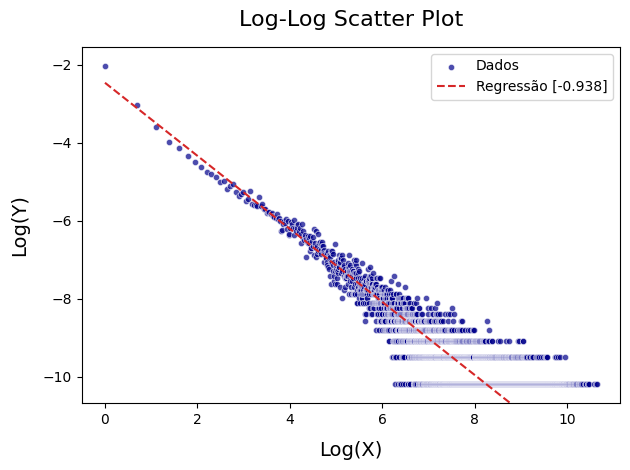

In [ ]:
x,y = np.unique(cascade,return_counts=True)
y = y/np.sum(y)
x_ = np.log(x)
y_ = np.log(y)
results = regressao_linear(x_[(x_>2) & (x_<6)],y_[(x_>2) & (x_<6)])

plt.scatter(np.log(x), np.log(y), color="darkblue", s=20, alpha=0.7, edgecolor="w", linewidth=0.5,label = 'Dados')
plt.plot(np.log(x),np.log(x)*results['coeficiente']+results['intercepto'],'--',color = 'tab:red',label = f"Regressão {np.round(results['coeficiente'],3)}")
# Rótulos de eixos com formatação aprimorada
plt.xlabel("Log(X)", fontsize=14, labelpad=10)
plt.ylabel("Log(Y)", fontsize=14, labelpad=10)

# Ajuste dos limites dos eixos (opcional)
plt.xlim(np.log(x).min() - 0.5, np.log(x).max() + 0.5)
plt.ylim(np.log(y).min() - 0.5, np.log(y).max() + 0.5)

# Grid discreto para facilitar a leitura
#plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

# Personalização do título e estilo do gráfico (opcional)
plt.title("Log-Log Scatter Plot", fontsize=16, pad=15)
plt.legend()
# Ajuste de layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()


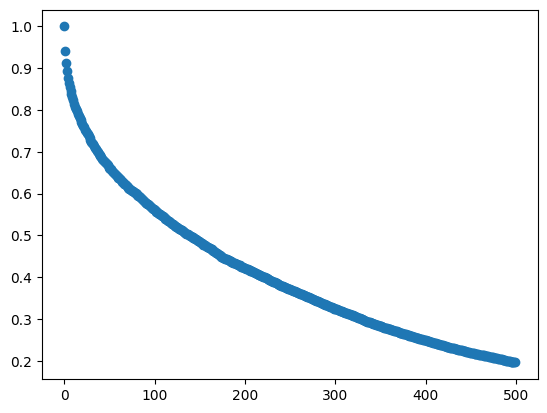

In [19]:
plt.scatter(df[:,0],df[:,1])
plt.show()


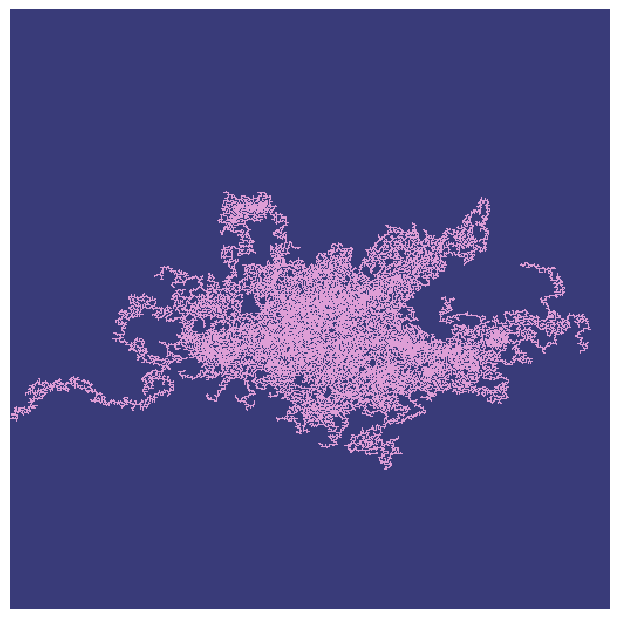

In [ ]:
cluster = np.loadtxt('./output/plot/plot_512_0.txt').astype(int)
matrix = np.zeros(512*512)
matrix[cluster] = 1
matrix = matrix.reshape((int(np.sqrt(len(matrix))), int(np.sqrt(len(matrix)))))
# Configuração do heatmap
plt.figure(figsize=(6, 6))
ax = plt.gca()
sns.heatmap(matrix, cmap='tab20b', cbar=False, square=True,ax =ax, xticklabels=False, yticklabels=False)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# Exibindo o gráfico
plt.show()


In [ ]:
import imageio
import os
if not os.path.exists('frames'):
    os.makedirs('frames')

# Lista para armazenar os nomes dos arquivos de imagem
image_files = []

# Intervalo dos arquivos
num_files = 201  # de 0 a 500

for i in range(num_files):
    # Lê o arquivo atual
    filename = f'./output/plot/plot_512_{i}.txt'
    cluster = np.loadtxt(filename).astype(int)
    
    # Cria a matriz
    matrix = np.zeros(512*512)
    matrix[cluster] = 1
    matrix = matrix.reshape((512, 512))
    
    # Configuração do heatmap
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    sns.heatmap(matrix, cmap='tab20b', cbar=False, square=True, ax=ax, xticklabels=False, yticklabels=False)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    # Salva o frame atual
    frame_filename = f'frames/frame_{i}.png'
    plt.savefig(frame_filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.close()
    
    # Adiciona o nome do arquivo à lista
    image_files.append(frame_filename)

# Cria o GIF
with imageio.get_writer('evolucao_sistema.gif', mode='I', duration=0.1) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Opcional: Remover os arquivos de frame após a criação do GIF
import shutil
shutil.rmtree('frames')

print("GIF criado com sucesso!")


/tmp/ipykernel_59141/1488737456.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF criado com sucesso!
